In [120]:
# Import required package
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import os.path
sns.set_style('whitegrid')
import scipy.stats as sta


In [121]:
import warnings
warnings.filterwarnings('ignore')

In [122]:
real_data = Path('realtor-data.csv') 
real = pd.read_csv(real_data)

In [123]:
real_df = pd.DataFrame(real)
real_df.head()

status     price  bed  bath  acre_lot  \
0  for_sale  105000.0  3.0   2.0      0.12   
1  for_sale   80000.0  4.0   2.0      0.08   
2  for_sale   67000.0  2.0   1.0      0.15   
3  for_sale  145000.0  4.0   2.0      0.10   
4  for_sale   65000.0  6.0   2.0      0.05   

                                        full_address  \
0  Sector Yahuecas Titulo # V84, Adjuntas, PR, 00601   
1            Km 78 9 Carr # 135, Adjuntas, PR, 00601   
2            556G 556-G 16 St, Juana Diaz, PR, 00795   
3  R5 Comunidad El Paraso Calle De Oro R-5 Ponce,...   
4                    14 Navarro, Mayaguez, PR, 00680   

                                          street        city        state  \
0                   Sector Yahuecas Titulo # V84    Adjuntas  Puerto Rico   
1                             Km 78 9 Carr # 135    Adjuntas  Puerto Rico   
2                               556G 556-G 16 St  Juana Diaz  Puerto Rico   
3  R5 Comunidad El Paraso Calle De Oro R-5 Ponce       Ponce  Puerto Rico   
4                                     14 Navarro    Mayaguez  Puerto Rico   

   zip_code  house_size sold_date  
0     601.0       920.0       NaN  
1     601.0      1527.0       NaN  
2     795.0       748.0       NaN  
3     731.0      1800.0       NaN  
4     680.0         NaN       NaN

In [124]:
real_df2 = real_df.dropna(how='any')
real_df2.head()

status     price  bed  bath  acre_lot  \
829   for_sale  110000.0  7.0   3.0      0.09   
3380  for_sale  110000.0  7.0   3.0      0.09   
5083  for_sale  110000.0  7.0   3.0      0.09   
5387  for_sale  110000.0  7.0   3.0      0.09   
9053  for_sale  110000.0  7.0   3.0      0.09   

                            full_address           street    city  \
829   B-2 Monte Elena, Dorado, PR, 00949  B-2 Monte Elena  Dorado   
3380  B-2 Monte Elena, Dorado, PR, 00949  B-2 Monte Elena  Dorado   
5083  B-2 Monte Elena, Dorado, PR, 00949  B-2 Monte Elena  Dorado   
5387  B-2 Monte Elena, Dorado, PR, 00949  B-2 Monte Elena  Dorado   
9053  B-2 Monte Elena, Dorado, PR, 00949  B-2 Monte Elena  Dorado   

            state  zip_code  house_size   sold_date  
829   Puerto Rico     949.0      1192.0  2019-06-28  
3380  Puerto Rico     949.0      1192.0  2019-06-28  
5083  Puerto Rico     949.0      1192.0  2019-06-28  
5387  Puerto Rico     949.0      1192.0  2019-06-28  
9053  Puerto Rico     949.0      1192.0  2019-06-28

In [125]:
real_df3 = real_df2.drop_duplicates(keep='first', inplace=False, ignore_index=False)
real_df3.head()

status      price  bed  bath  acre_lot  \
829    for_sale   110000.0  7.0   3.0      0.09   
10344  for_sale   950000.0  5.0   4.0      0.99   
10351  for_sale  6899000.0  4.0   6.0      0.83   
24237  for_sale   525000.0  3.0   3.0      0.45   
24238  for_sale   289900.0  3.0   2.0      0.36   

                                  full_address                street  \
829         B-2 Monte Elena, Dorado, PR, 00949       B-2 Monte Elena   
10344   46 Water Isle, Saint Thomas, VI, 00802         46 Water Isle   
10351   10 Water Isle, Saint Thomas, VI, 00802         10 Water Isle   
24237          955 River Rd, Agawam, MA, 01001          955 River Rd   
24238  82 Harvey Johnson Dr, Agawam, MA, 01001  82 Harvey Johnson Dr   

               city           state  zip_code  house_size   sold_date  
829          Dorado     Puerto Rico     949.0      1192.0  2019-06-28  
10344  Saint Thomas  Virgin Islands     802.0      5000.0  2013-10-11  
10351  Saint Thomas  Virgin Islands     802.0      4600.0  2018-04-05  
24237        Agawam   Massachusetts    1001.0      2314.0  2014-06-25  
24238        Agawam   Massachusetts    1001.0      1276.0  2012-10-12

In [126]:
real_df3['year'] = pd.DatetimeIndex(real_df3['sold_date']).year
real_df3.head()

status      price  bed  bath  acre_lot  \
829    for_sale   110000.0  7.0   3.0      0.09   
10344  for_sale   950000.0  5.0   4.0      0.99   
10351  for_sale  6899000.0  4.0   6.0      0.83   
24237  for_sale   525000.0  3.0   3.0      0.45   
24238  for_sale   289900.0  3.0   2.0      0.36   

                                  full_address                street  \
829         B-2 Monte Elena, Dorado, PR, 00949       B-2 Monte Elena   
10344   46 Water Isle, Saint Thomas, VI, 00802         46 Water Isle   
10351   10 Water Isle, Saint Thomas, VI, 00802         10 Water Isle   
24237          955 River Rd, Agawam, MA, 01001          955 River Rd   
24238  82 Harvey Johnson Dr, Agawam, MA, 01001  82 Harvey Johnson Dr   

               city           state  zip_code  house_size   sold_date  year  
829          Dorado     Puerto Rico     949.0      1192.0  2019-06-28  2019  
10344  Saint Thomas  Virgin Islands     802.0      5000.0  2013-10-11  2013  
10351  Saint Thomas  Virgin Islands     802.0      4600.0  2018-04-05  2018  
24237        Agawam   Massachusetts    1001.0      2314.0  2014-06-25  2014  
24238        Agawam   Massachusetts    1001.0      1276.0  2012-10-12  2012

In [127]:
real_df3.dtypes

status           object
price           float64
bed             float64
bath            float64
acre_lot        float64
full_address     object
street           object
city             object
state            object
zip_code        float64
house_size      float64
sold_date        object
year              int64
dtype: object

In [128]:
real_df4=real_df3.loc[real_df3['year'] >= 2000
                     ,: ]
real_df4.head()

status      price  bed  bath  acre_lot  \
829    for_sale   110000.0  7.0   3.0      0.09   
10344  for_sale   950000.0  5.0   4.0      0.99   
10351  for_sale  6899000.0  4.0   6.0      0.83   
24237  for_sale   525000.0  3.0   3.0      0.45   
24238  for_sale   289900.0  3.0   2.0      0.36   

                                  full_address                street  \
829         B-2 Monte Elena, Dorado, PR, 00949       B-2 Monte Elena   
10344   46 Water Isle, Saint Thomas, VI, 00802         46 Water Isle   
10351   10 Water Isle, Saint Thomas, VI, 00802         10 Water Isle   
24237          955 River Rd, Agawam, MA, 01001          955 River Rd   
24238  82 Harvey Johnson Dr, Agawam, MA, 01001  82 Harvey Johnson Dr   

               city           state  zip_code  house_size   sold_date  year  
829          Dorado     Puerto Rico     949.0      1192.0  2019-06-28  2019  
10344  Saint Thomas  Virgin Islands     802.0      5000.0  2013-10-11  2013  
10351  Saint Thomas  Virgin Islands     802.0      4600.0  2018-04-05  2018  
24237        Agawam   Massachusetts    1001.0      2314.0  2014-06-25  2014  
24238        Agawam   Massachusetts    1001.0      1276.0  2012-10-12  2012

In [129]:
len(real_df4)

15953

In [130]:
real_df4.to_csv("clean_re_data.csv", index=False, encoding="ISO-8859-1")

In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import statsmodels.api as sm
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split, GridSearchCV

!pip install plotly

In [2]:
import pandas as pd
# Load the data into a DataFrame
df = pd.read_csv('clean_re_data.csv')
# Clean and prepare the data
df.dropna(inplace=True)  # Remove missing values
df = df[(df['bed'] == 3) & (df['bath'] == 1)]  # Filter for 3-bedroom homes with 1 bathroom

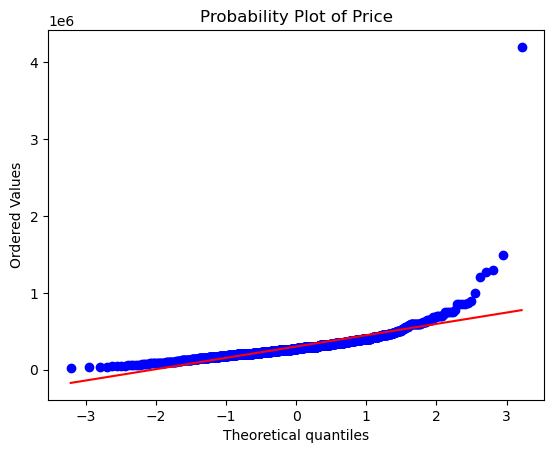

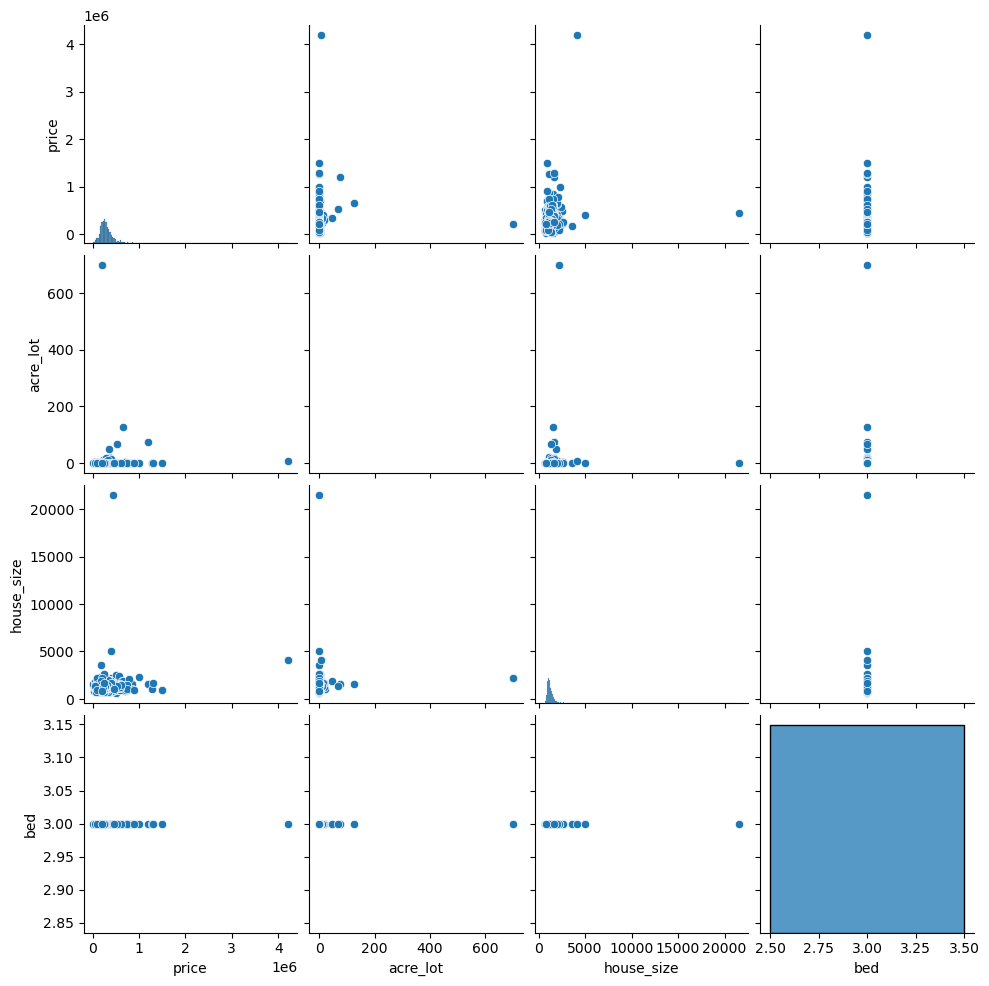

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.019
Model:                            OLS   Adj. R-squared:                  0.017
Method:                 Least Squares   F-statistic:                     10.12
Date:                Tue, 01 Aug 2023   Prob (F-statistic):           4.44e-05
Time:                        13:49:00   Log-Likelihood:                -14404.
No. Observations:                1062   AIC:                         2.881e+04
Df Residuals:                    1059   BIC:                         2.883e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   2.546e+04   1180.609     21.562      0.0

In [3]:
# Analyze the data using statistical methods
import scipy.stats as stats
# Check the distribution of the price
stats.probplot(df['price'], plot=plt)
plt.title('Probability Plot of Price')
plt.show()
# Check the relationship between price and other variables
sns.pairplot(df[['price', 'acre_lot', 'house_size', 'bed']])
plt.show()
# Test for statistical significance
from statsmodels.formula.api import ols
model = ols('price ~ acre_lot + house_size + bed', data=df).fit()
print(model.summary())

In [4]:
df.head()

status     price  bed  bath  acre_lot  \
35  for_sale  300000.0  3.0   1.0      0.69   
46  for_sale  279900.0  3.0   1.0      0.13   
51  for_sale  199900.0  3.0   1.0      0.26   
54  for_sale  275000.0  3.0   1.0      0.29   
62  for_sale  289900.0  3.0   1.0      0.26   

                            full_address          street         city  \
35  34 Pequot Rd, Southampton, MA, 01073    34 Pequot Rd  Southampton   
46       3 Fenton St, Holyoke, MA, 01040     3 Fenton St      Holyoke   
51        97 Leo Dr, Chicopee, MA, 01020       97 Leo Dr     Chicopee   
54    87 Maple St, Greenfield, MA, 01301     87 Maple St   Greenfield   
62    339 Jarvis Ave, Holyoke, MA, 01040  339 Jarvis Ave      Holyoke   

            state  zip_code  house_size   sold_date  year  
35  Massachusetts    1073.0      1200.0  2000-07-10  2000  
46  Massachusetts    1040.0      1456.0  2019-10-21  2019  
51  Massachusetts    1020.0      1048.0  2005-07-18  2005  
54  Massachusetts    1301.0      1482.0  2001-10-31  2001  
62  Massachusetts    1040.0      1096.0  2019-05-10  2019

In [5]:
num_countries = df['state'].unique()

print("Number of different states:", num_countries)

Number of different states: ['Massachusetts' 'Connecticut' 'New Hampshire' 'Vermont' 'New York'
 'Rhode Island' 'Maine' 'New Jersey' 'Pennsylvania' 'Delaware']


In [72]:
state_stats = df.groupby('bed')['price'].agg(['mean', 'median', 'min', 'max'])

print(state_stats)

              mean     median        min         max
bed                                                 
1.0   4.589620e+05   325000.0    28000.0   1820000.0
2.0   4.626919e+05   334000.0    39900.0   6200000.0
3.0   4.988103e+05   389900.0    20000.0  15500000.0
4.0   7.888249e+05   579450.0    10000.0  19000000.0
5.0   1.313003e+06   850000.0    65000.0  16000000.0
6.0   1.751066e+06   799000.0    59200.0  32000000.0
7.0   2.588677e+06   948000.0    24900.0  34990000.0
8.0   1.907972e+06   599000.0   105000.0  39000000.0
9.0   1.693817e+06   549950.0   179900.0  60000000.0
10.0  9.901948e+05   529900.0   179900.0   4400000.0
11.0  3.605121e+06  1200000.0   179900.0  30000000.0
12.0  2.400016e+06   819900.0   225000.0  16900000.0
13.0  7.449833e+05   660000.0   324900.0   1500000.0
14.0  3.046286e+06  1600000.0   385000.0  14000000.0
15.0  1.147000e+06  1147000.0   799000.0   1495000.0
16.0  9.500000e+05   950000.0   950000.0    950000.0
19.0  2.797500e+06  2797500.0  2195000.0   340

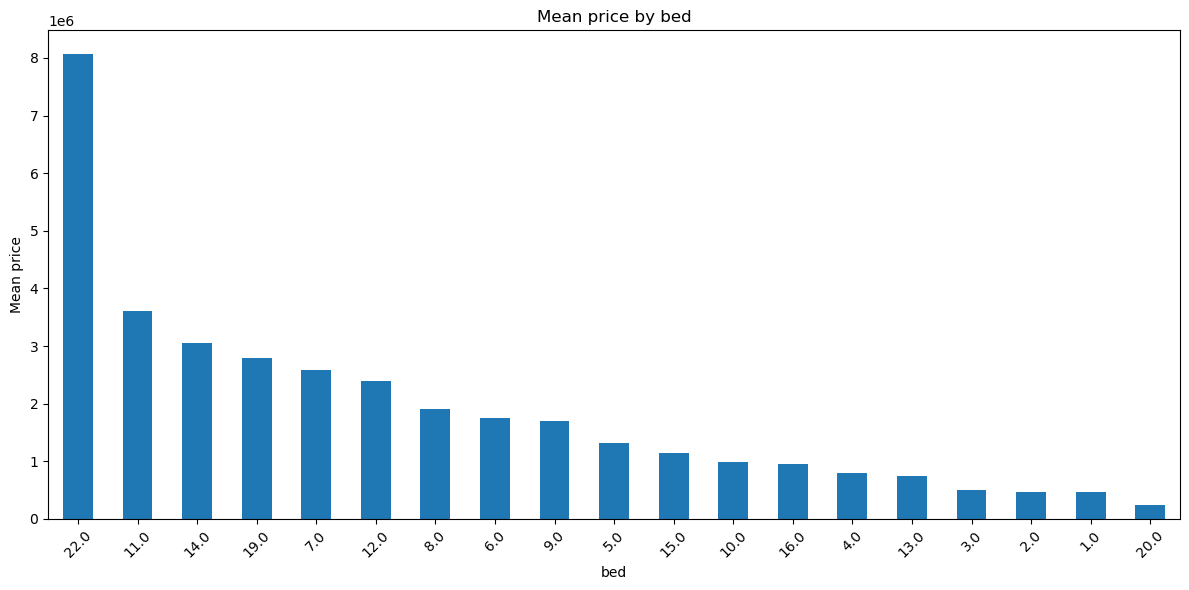

In [73]:
state_mean_price = df.groupby('bed')['price'].mean().sort_values(ascending = False)
plt.figure(figsize=(12, 6))
state_mean_price.plot(kind='bar')
plt.xlabel('bed')
plt.ylabel('Mean price')
plt.title('Mean price by bed')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [74]:
df.describe()

price           bed          bath      acre_lot      zip_code  \
count  1.595300e+04  15953.000000  15953.000000  15953.000000  15953.000000   
mean   7.955384e+05      3.708205      2.734721      5.487843   6963.201341   
std    1.420715e+06      1.500725      1.495005    211.086562   3558.050253   
min    1.000000e+04      1.000000      1.000000      0.000000    802.000000   
25%    3.000000e+05      3.000000      2.000000      0.120000   4461.000000   
50%    4.699000e+05      3.000000      2.000000      0.260000   6704.000000   
75%    7.790000e+05      4.000000      3.000000      0.770000   8816.000000   
max    6.000000e+07     22.000000     19.000000  18817.000000  19809.000000   

         house_size          year  
count  15953.000000  15953.000000  
mean    2379.944901   2011.901084  
std     2139.123937      6.717645  
min      280.000000   2000.000000  
25%     1344.000000   2006.000000  
50%     1872.000000   2013.000000  
75%     2733.000000   2018.000000  
max    52708.000000   2022.000000

In [75]:
df.duplicated().sum()
df.drop_duplicates(inplace=True)

In [76]:
total_missing = df.isna().sum()*100/len(df)
print('Percentage Missing Value %')
total_missing

Percentage Missing Value %


status          0.0
price           0.0
bed             0.0
bath            0.0
acre_lot        0.0
full_address    0.0
street          0.0
city            0.0
state           0.0
zip_code        0.0
house_size      0.0
sold_date       0.0
year            0.0
dtype: float64

In [77]:
df['bed'].fillna(df['bed'].mode()[0], inplace=True)
df['bath'].fillna(df['bath'].mode()[0], inplace=True)
df['acre_lot'].fillna(df['acre_lot'].mode()[0], inplace=True)
df['house_size'].fillna(df['house_size'].mode()[0], inplace=True)

In [78]:
df = df.dropna(subset=['zip_code','city'])
df = df.drop('sold_date', axis=1)

In [79]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15953 entries, 0 to 15952
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   status        15953 non-null  object 
 1   price         15953 non-null  float64
 2   bed           15953 non-null  float64
 3   bath          15953 non-null  float64
 4   acre_lot      15953 non-null  float64
 5   full_address  15953 non-null  object 
 6   street        15953 non-null  object 
 7   city          15953 non-null  object 
 8   state         15953 non-null  object 
 9   zip_code      15953 non-null  float64
 10  house_size    15953 non-null  float64
 11  year          15953 non-null  int64  
dtypes: float64(6), int64(1), object(5)
memory usage: 1.6+ MB


In [80]:
column_num = ['bed', 'bath', 'acre_lot', 'house_size', 'price']


fig = px.box(df[column_num], labels={'variable': 'Column', 'value': 'Value'}, title='Outlier Before Remove')


fig.update_xaxes(tickvals=[1, 2, 3, 4, 5], ticktext=column_num)


fig.show()

print(f'Total Rows with Outliers: {df.shape[0]}')

Total Rows with Outliers: 15953


In [81]:
Q1 = df[column_num].quantile(0.25)
Q3 = df[column_num].quantile(0.75)
IQR = Q3 - Q1

df = df[~((df[column_num] < (Q1 - 1.5 * IQR)) | (df[column_num] > (Q3 + 1.5 * IQR))).any(axis=1)]
print(IQR)

bed                1.00
bath               1.00
acre_lot           0.65
house_size      1389.00
price         479000.00
dtype: float64


In [82]:
column_num = ['bed', 'bath', 'acre_lot', 'house_size', 'price']


df_selected = df[column_num]

df_selected_melted = df_selected.melt(var_name='Column', value_name='Value')
fig = px.box(df_selected_melted, x='Column', y='Value', title='Outlier After Remove')

fig.update_xaxes(tickvals=[1, 2, 3, 4, 5], ticktext=column_num)

fig.show()

print(f'Total Rows Without Outliers: {df.shape[0]}')

Total Rows Without Outliers: 11202


In [83]:
summary_stats = df.describe()
print(summary_stats)

              price           bed          bath      acre_lot      zip_code  \
count  1.120200e+04  11202.000000  11202.000000  11202.000000  11202.000000   
mean   4.773076e+05      3.291198      2.271648      0.358886   7019.903589   
std    2.711455e+05      0.818396      0.837283      0.356878   3691.697215   
min    2.000000e+04      2.000000      1.000000      0.000000   1001.000000   
25%    2.799000e+05      3.000000      2.000000      0.110000   4462.250000   
50%    3.999970e+05      3.000000      2.000000      0.230000   6610.000000   
75%    6.139250e+05      4.000000      3.000000      0.460000   8817.000000   
max    1.495000e+06      5.000000      4.000000      1.740000  19809.000000   

         house_size          year  
count  11202.000000  11202.000000  
mean    1786.372433   2011.923049  
std      708.217369      6.717824  
min      420.000000   2000.000000  
25%     1260.000000   2006.000000  
50%     1627.000000   2013.000000  
75%     2163.000000   2018.000000  


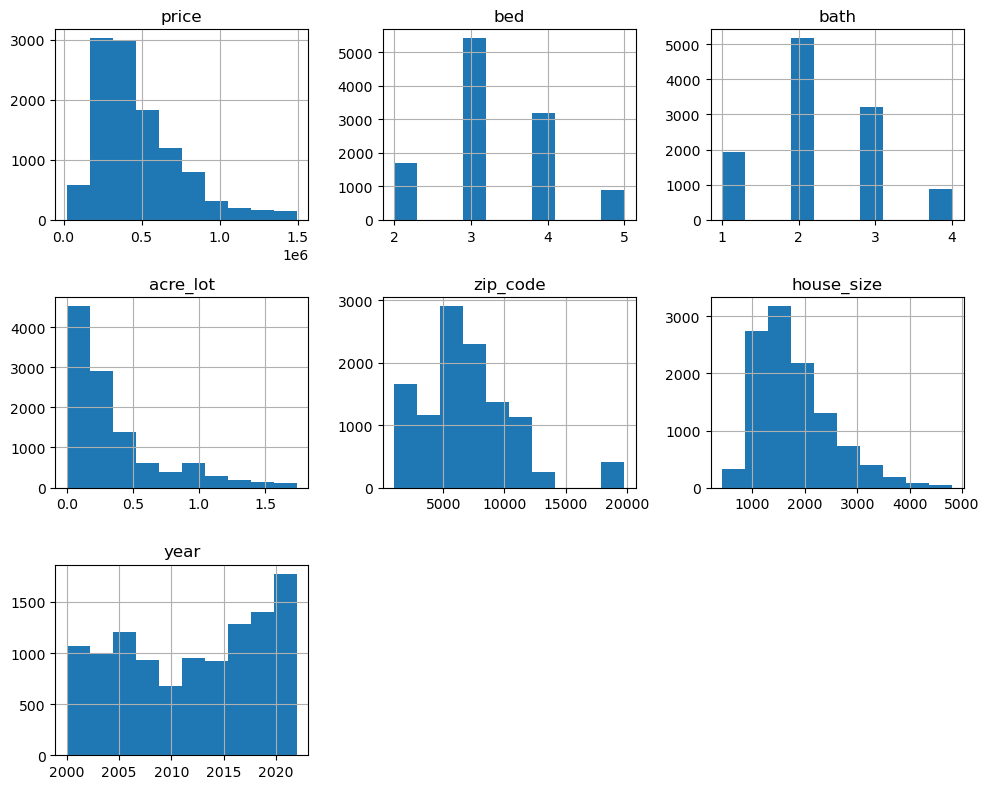

In [84]:
df.hist(bins=10, figsize=(10, 8))
plt.tight_layout()
plt.show()

/var/folders/wh/dcrmmvwj20v17sfy6sn_5xyr0000gn/T/ipykernel_13460/3106231958.py:1: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



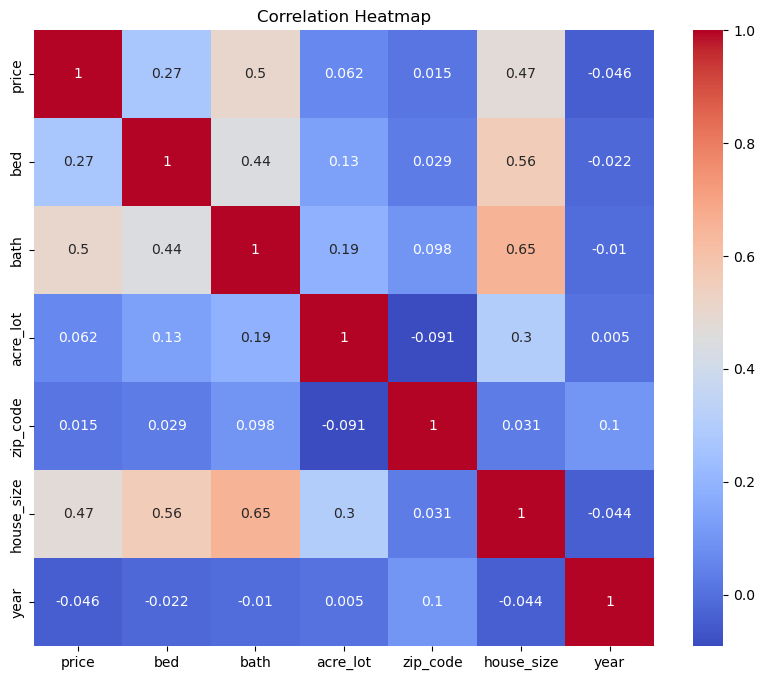

In [86]:
correlation_matrix = df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

Connecticut      3555
New Jersey       2250
New York         1876
Massachusetts    1306
Rhode Island      918
New Hampshire     435
Pennsylvania      259
Vermont           236
Maine             215
Delaware          152
Name: state, dtype: int64


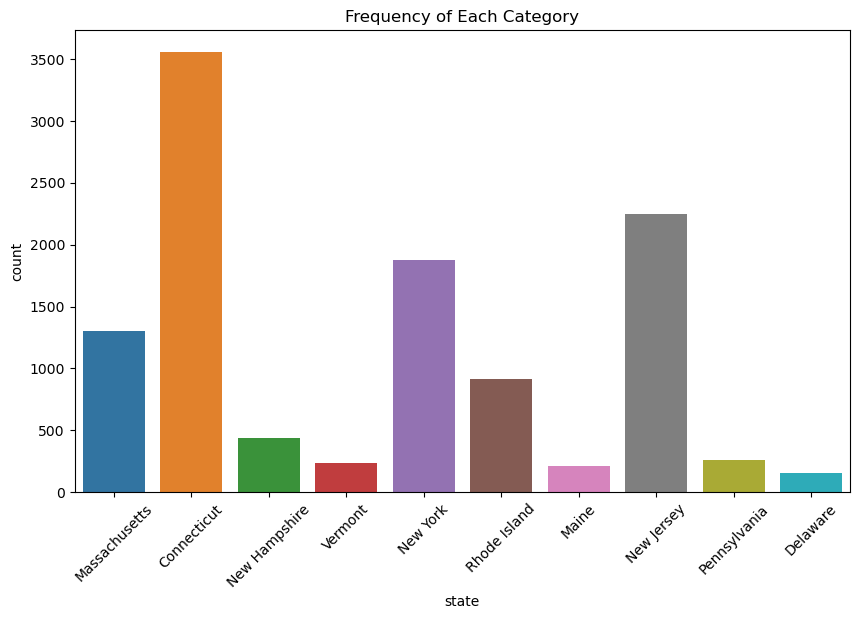

In [89]:
categorical_column = 'state'
value_counts = df[categorical_column].value_counts(ascending = False)
print(value_counts)

plt.figure(figsize=(10, 6))
sns.countplot(x=categorical_column, data=df)
plt.xticks(rotation=45)
plt.title('Frequency of Each Category')
plt.show()

In [90]:
df['price_per_sqft'] = df['price'] / df['house_size']

In [91]:
price_per_sqft_by_city = df.groupby('state')['price_per_sqft'].mean()
print(price_per_sqft_by_city)

state
Connecticut      232.673262
Delaware         146.811228
Maine            213.777296
Massachusetts    351.638565
New Hampshire    233.451705
New Jersey       269.128880
New York         396.593905
Pennsylvania     149.927193
Rhode Island     283.455194
Vermont          163.274864
Name: price_per_sqft, dtype: float64


In [92]:
z_scores = (df['price_per_sqft'] - df['price_per_sqft'].mean()) / df['price_per_sqft'].std()

outlier_threshold = 3
outliers = df[z_scores.abs() > outlier_threshold]

df = df[z_scores.abs() <= outlier_threshold]

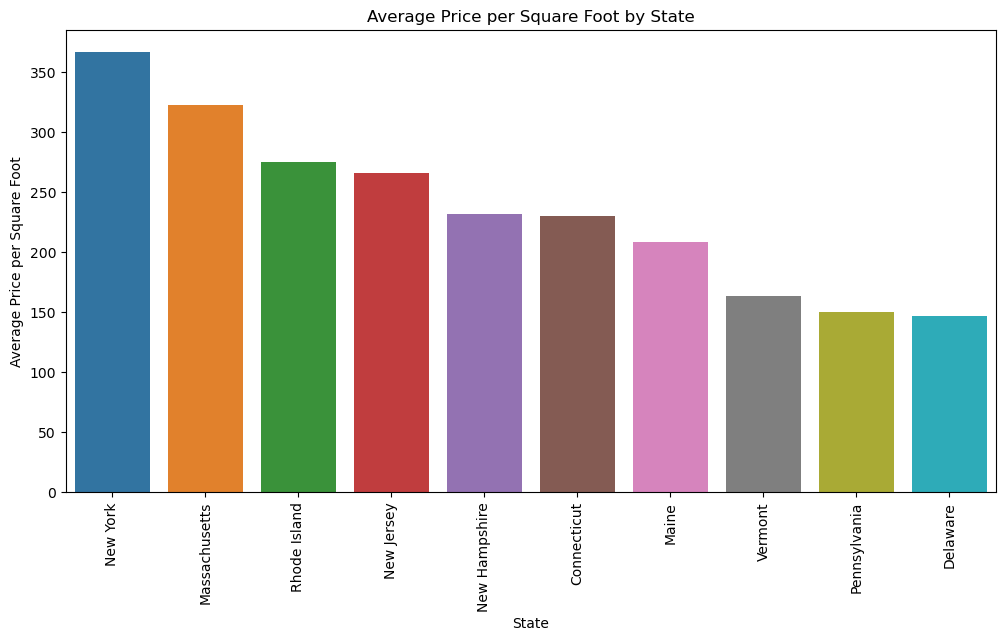

In [93]:
avg_price_per_sqft_by_city = df.groupby('state')['price_per_sqft'].mean().sort_values(ascending=False)
plt.figure(figsize=(12, 6))
sns.barplot(x=avg_price_per_sqft_by_city.index, y=avg_price_per_sqft_by_city.values)
plt.xticks(rotation=90)
plt.xlabel('State')
plt.ylabel('Average Price per Square Foot')
plt.title('Average Price per Square Foot by State')
plt.show()

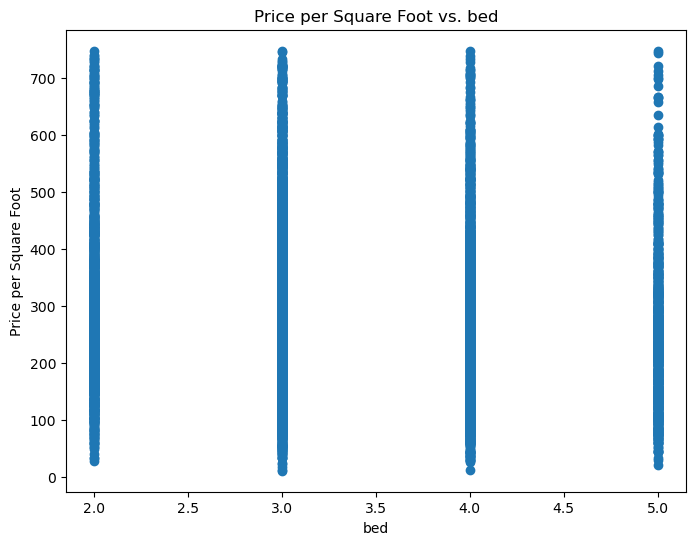

In [95]:
plt.figure(figsize=(8, 6))
plt.scatter(df['bed'], df['price_per_sqft'])
plt.xlabel('bed')
plt.ylabel('Price per Square Foot')
plt.title('Price per Square Foot vs. bed')
plt.show()


In [96]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11004 entries, 3 to 15951
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   status          11004 non-null  object 
 1   price           11004 non-null  float64
 2   bed             11004 non-null  float64
 3   bath            11004 non-null  float64
 4   acre_lot        11004 non-null  float64
 5   full_address    11004 non-null  object 
 6   street          11004 non-null  object 
 7   city            11004 non-null  object 
 8   state           11004 non-null  object 
 9   zip_code        11004 non-null  float64
 10  house_size      11004 non-null  float64
 11  year            11004 non-null  int64  
 12  price_per_sqft  11004 non-null  float64
dtypes: float64(7), int64(1), object(5)
memory usage: 1.2+ MB


In [97]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import mean_squared_error

features = ['status', 'bed', 'bath', 'acre_lot', 'city', 'state', 'zip_code', 'house_size']
target = 'price'


cat_features = ['status', 'city', 'state', 'zip_code']
num_features = ['bed', 'bath', 'acre_lot', 'house_size']
preprocessor = ColumnTransformer([('encoder', OneHotEncoder(), cat_features)], remainder='passthrough')
encoded_features = preprocessor.fit_transform(df[features])


X_train, X_test, y_train, y_test = train_test_split(encoded_features, df[target], test_size=0.2, random_state=42)


model = LinearRegression()


model.fit(X_train, y_train)


y_pred = model.predict(X_test)


mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

Mean Squared Error: 18605909266.490124


In [98]:
from sklearn.metrics import r2_score, mean_absolute_error

r2 = r2_score(y_test, y_pred)
print(f"R-squared: {r2}")

mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Absolute Error: {mae}")

R-squared: 0.7418676410991678
Mean Absolute Error: 93623.77256323036


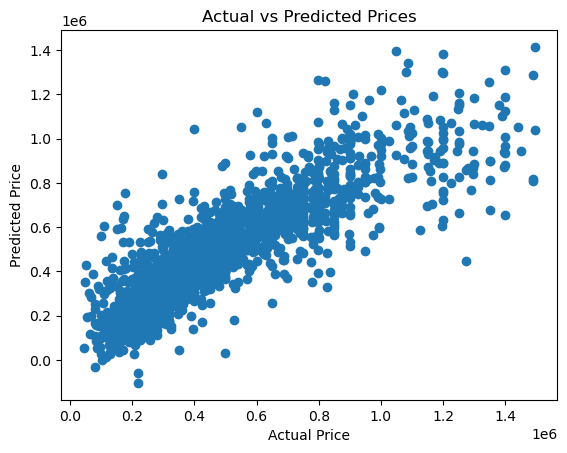

In [99]:
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual vs Predicted Prices')
plt.show()


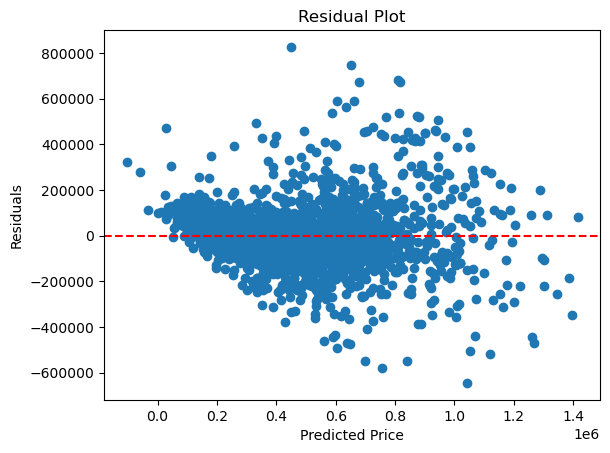

In [100]:
residuals = y_test - y_pred

plt.scatter(y_pred, residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted Price')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()

In [101]:
print(df.columns)

Index(['status', 'price', 'bed', 'bath', 'acre_lot', 'full_address', 'street',
       'city', 'state', 'zip_code', 'house_size', 'year', 'price_per_sqft'],
      dtype='object')


In [102]:
numerical_features = ['bed', 'bath', 'acre_lot', 'house_size']

target = 'price'


X_train, X_test, y_train, y_test = train_test_split(df[numerical_features], df[target], test_size=0.2, random_state=42)

In [103]:
model = LinearRegression()

In [104]:
model.fit(X_train, y_train)

LinearRegression()

In [105]:
y_pred = model.predict(X_test)

In [106]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [107]:
print("Mean Squared Error:", mse)
print("R^2 Score:", r2)

Mean Squared Error: 44455132455.525444
R^2 Score: 0.3832438908717487


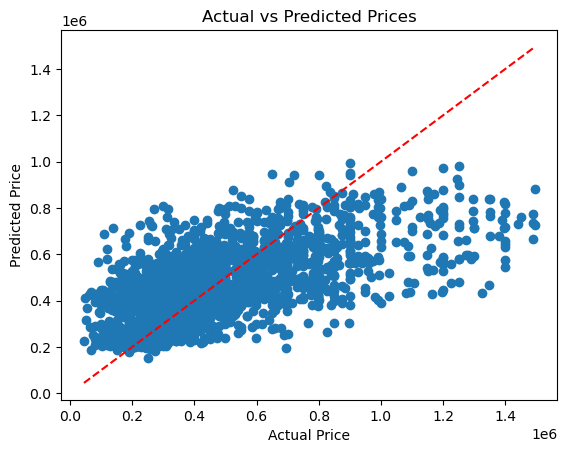

In [108]:
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual vs Predicted Prices")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.show()

In [109]:
import numpy as np
import pandas as pd
from scipy.stats import ttest_ind

In [110]:
# Load the data
data = pd.read_csv('clean_re_data.csv')
# Create two groups of data
group1 = data[data['bed'] == 3]
group2 = data[data['bed'] == 4]
# Perform the t-test
t_statistic, p_value = ttest_ind(group1['price'], group2['price'])
# Print the results
print('t-statistic:', t_statistic)
print('p-value:', p_value)

t-statistic: -20.682018888262558
p-value: 3.601898620944789e-93


In [39]:
%matplotlib inline
from pathlib import Path
import pandas as pd
import scipy.stats as stats

In [66]:
# Read in the data. 
df = pd.read_csv('clean_re_data.csv')
df.head()

status      price  bed  bath  acre_lot  \
0  for_sale   110000.0  7.0   3.0      0.09   
1  for_sale   950000.0  5.0   4.0      0.99   
2  for_sale  6899000.0  4.0   6.0      0.83   
3  for_sale   525000.0  3.0   3.0      0.45   
4  for_sale   289900.0  3.0   2.0      0.36   

                              full_address                street  \
0       B-2 Monte Elena, Dorado, PR, 00949       B-2 Monte Elena   
1   46 Water Isle, Saint Thomas, VI, 00802         46 Water Isle   
2   10 Water Isle, Saint Thomas, VI, 00802         10 Water Isle   
3          955 River Rd, Agawam, MA, 01001          955 River Rd   
4  82 Harvey Johnson Dr, Agawam, MA, 01001  82 Harvey Johnson Dr   

           city           state  zip_code  house_size   sold_date  year  
0        Dorado     Puerto Rico     949.0      1192.0  2019-06-28  2019  
1  Saint Thomas  Virgin Islands     802.0      5000.0  2013-10-11  2013  
2  Saint Thomas  Virgin Islands     802.0      4600.0  2018-04-05  2018  
3        Agawam   Massachusetts    1001.0      2314.0  2014-06-25  2014  
4        Agawam   Massachusetts    1001.0      1276.0  2012-10-12  2012

<Axes: title={'center': 'price'}, xlabel='state'>

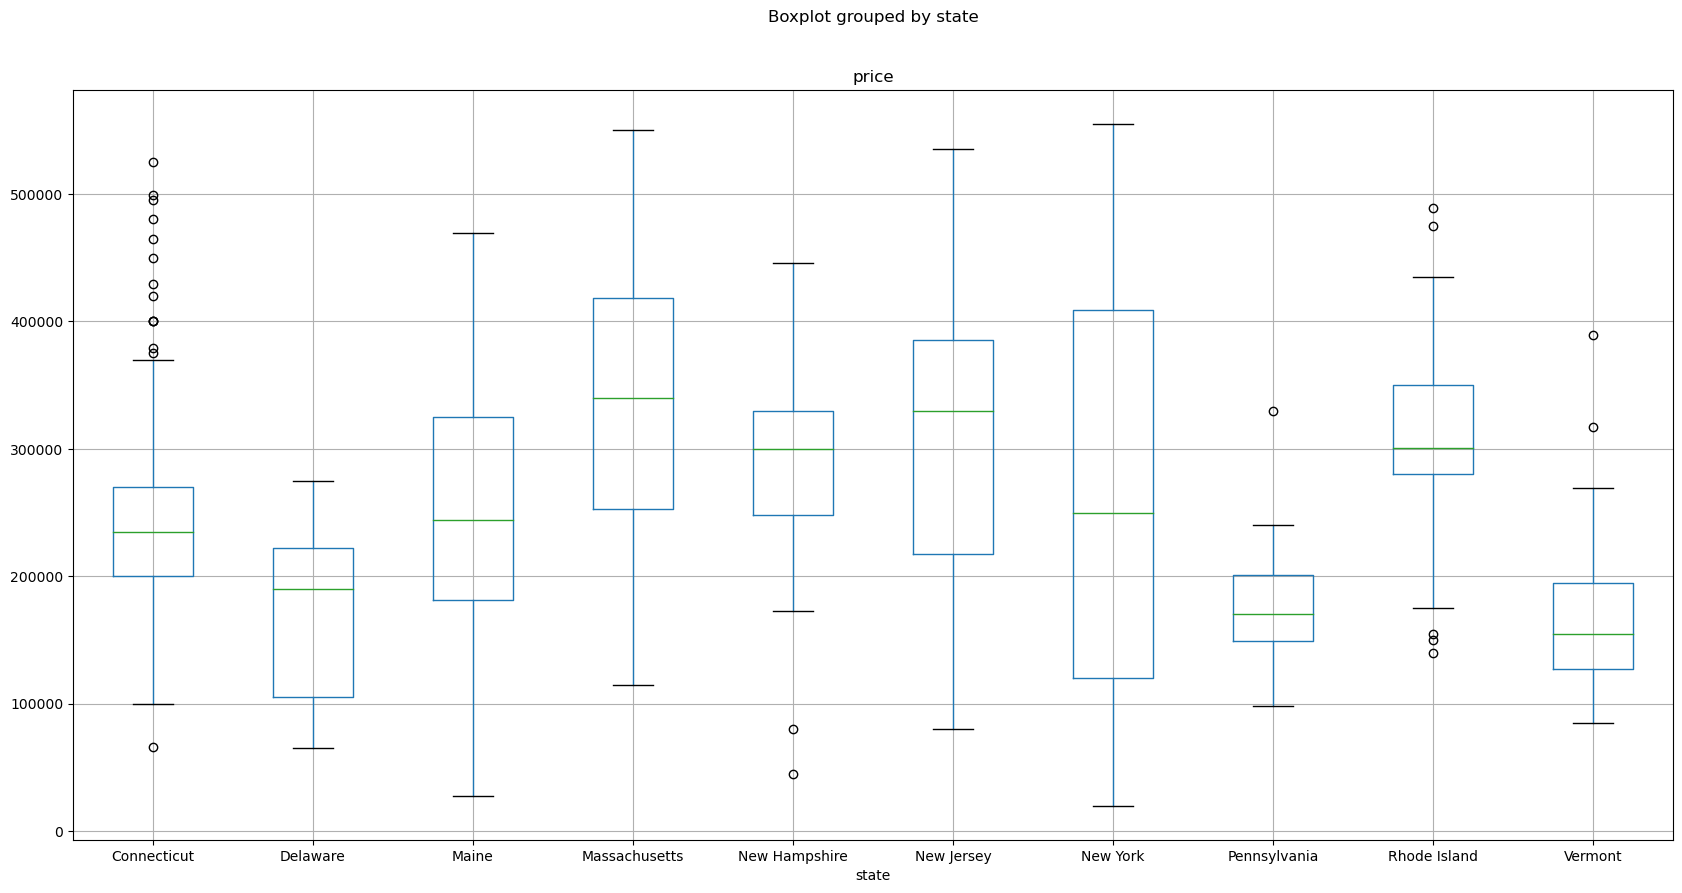

In [41]:
df.boxplot("price", by="state", figsize=(20, 10))

In [42]:
group0 = df[df["state"] == 0]["price"]
group1 = df[df["state"] == 1]["price"]
group2 = df[df["state"] == 2]["price"]
group3 = df[df["state"] == 3]["price"]
group4 = df[df["state"] == 4]["price"]

In [43]:
stats.f_oneway(group0, group1, group2, group3, group4)

/Users/richardsladertorres/anaconda3/lib/python3.10/site-packages/scipy/stats/_stats_py.py:3861: DegenerateDataWarning:

at least one input has length 0



F_onewayResult(statistic=nan, pvalue=nan)

In [44]:
import numpy as np
import pandas as pd

In [45]:
import scipy.stats as stats

In [46]:
observed = pd.Series([1500, 1350, 1600, 1550], index=["1", "2", "3", "4"])


df = pd.DataFrame([observed]).T

df[1] = 1500

df.columns = ["observed", "expected"]

df

observed  expected
1      1500      1500
2      1350      1500
3      1600      1500
4      1550      1500

In [47]:
critical_value = stats.chi2.ppf(q = 0.95, df = 3)

In [48]:
critical_value

7.814727903251179

In [49]:
stats.chisquare(df['observed'], df['expected'])

Power_divergenceResult(statistic=23.333333333333336, pvalue=3.4411276663397364e-05)